# Numpy - Arquivos, Álgebra Linear e Imagens

**Disciplina**: Programação para Ciência dos Dados  
**Docentes**: Elloá B. Guedes e Tiago E. de Melo  
**Contato:** ebgcosta@uea.edu.br, tmelo@uea.edu.br  
**Github:** http://github.com/elloa/numpy

## Apresentação

Este notebook deverá ser utilizado para a prática dos conceitos relativos à biblioteca numpy.

In [1]:
# Reservado para bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

## Parte 4.1 - Abrindo uma imagem com o matplotlib

1. Abra a imagem 'onca.jpg' disponível no diretório ../data    
   1.1 Esta fotografia é de autoria de Araquém Alcântara  
   1.2 Vamos utilizar dois subpacotes do matplotlib:
   
   ```python
    import matplotlib.pyplot as plt  
    import matplotlib.image as mpimg
    
    img = mpimg.imread('<caminho_da_imagem>')
    print(img)
   ```
   - Documentação: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow  
   - Documentação: https://matplotlib.org/3.3.1/api/image_api.html  
2. Exiba a imagem como fotografia e como um ndarray
3. Imprima o shape da imagem e o número de dimensões (rank)

In [2]:
img = mpimg.imread(".." + os.sep + "data" + os.sep + "onca.jpg")

&lt;matplotlib.image.AxesImage at 0x1f2e68d5d60&gt;

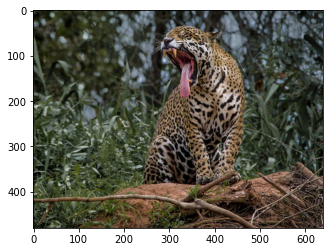

In [3]:
plt.imshow(img)

In [4]:
img.shape

(480, 640, 3)

In [6]:
img

array([[[ 45,  54,  37],
        [ 51,  58,  42],
        [ 53,  59,  45],
        ...,
        [ 44,  59,  56],
        [ 29,  48,  42],
        [ 24,  41,  33]],

       [[ 45,  54,  37],
        [ 48,  55,  39],
        [ 53,  60,  44],
        ...,
        [ 58,  68,  67],
        [ 43,  58,  53],
        [ 29,  41,  37]],

       [[ 44,  53,  36],
        [ 48,  55,  39],
        [ 53,  60,  44],
        ...,
        [ 63,  72,  71],
        [ 59,  69,  68],
        [ 41,  52,  48]],

       ...,

       [[  3,   7,   6],
        [  4,   9,   3],
        [  8,  13,   6],
        ...,
        [158, 136, 138],
        [169, 139, 139],
        [121, 103,  91]],

       [[  5,  10,   6],
        [  1,   6,   0],
        [  5,  11,   1],
        ...,
        [ 78,  66,  66],
        [169, 140, 144],
        [173, 156, 149]],

       [[ 13,  18,  12],
        [  1,   6,   0],
        [  3,   8,   1],
        ...,
        [ 87,  78,  73],
        [109,  85,  83],
        [142, 127, 122]]

In [7]:
img[0,0,:]

array([45, 54, 37], dtype=uint8)

## Parte 4.2 - Extraindo os canais R-G-B

1. A imagem é representada por uma matriz tridimensional de dimensões 640x480x3.   
  1.1 Considerando o formato RGB, esta pode ser interpretada como mostra a imagem a seguir  
  1.2 Abordagem channels last


<img src="../img/three_d_array.png" height=300 width=300>

2. Extraia cada um dos canais e imprima-os como uma imagem  
  2.1 Para visualizar nos tons dos canais, preencha as demais dimensões com zeros
3. Armazene o array do canal vermelho em um arquivo na pasta ../data  
  3.1 Salve o arquivo como red.npy, utilizando o formato binário  
  3.2 https://numpy.org/doc/stable/reference/generated/numpy.save.html  
  3.3 Recupere-o do arquivo e compare-o com a versão em memória

In [82]:
camada_01 = img[:,:,0]
camada_02 = img[:,:,1]
camada_03 = img[:,:,2]

In [83]:
print(f"1 -> {camada_01[0,0]}\n2 -> {camada_02[0,0]}\n3 -> {camada_03[0,0]}")

1 -&gt; 45
2 -&gt; 54
3 -&gt; 37


In [84]:
camada_01.shape

(480, 640)

In [85]:
red = np.stack((camada_01, np.zeros([480,640]), np.zeros([480,640])), axis=-1)
green = np.stack((np.zeros([480,640]), camada_02, np.zeros([480,640])), axis=-1)
blue = np.stack((np.zeros([480,640]), np.zeros([480,640]), camada_03), axis=-1)

In [98]:
red = np.int16(red)
green = np.int16(green)
blue = np.int16(blue)

In [100]:
red.shape

(480, 640, 3)

&lt;matplotlib.image.AxesImage at 0x1f2ec2c77c0&gt;

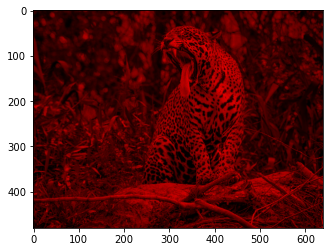

In [106]:
plt.imshow(red)

In [102]:
np.save(".." + os.sep + "data" + os.sep + "vermelho", red)

&lt;matplotlib.image.AxesImage at 0x1f2f3caf2b0&gt;

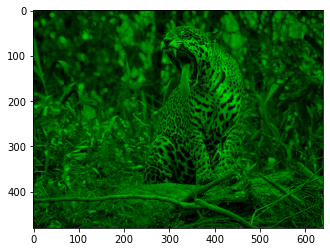

In [103]:
plt.imshow(green)

&lt;matplotlib.image.AxesImage at 0x1f2f3a89100&gt;

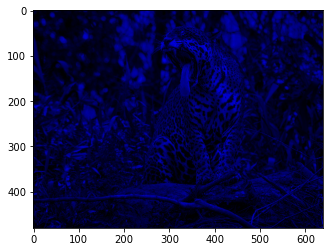

In [104]:
plt.imshow(blue)

## Parte 4.3 - Convertendo para Tons de Cinza

De acordo com a Teoria da Colorimetria, uma maneira de obter uma representação em tons de cinza de uma imagem é por meio da seguinte operação, em que Y é a nova imagem resultante


$$Y = 0.2126 R + 0.7152 G + 0.0722 B$$

1. A transformação em questão é análoga à multiplicação matricial a seguir:

$$ nova = imagem \times [0.2126, 0.7152, 0.0722]$$

2. Para fazer uso de broadcasting, considere a utilização de np.matmul:  
   https://numpy.org/doc/stable/reference/generated/numpy.matmul.html#numpy.matmul
   
3. Ao imprimir, utilize o cmap = "grey"
4. Salve a imagem em tons de cinza (oncacinza) na pasta ../data
```python
import imageio
imageio.imwrite('<caminho+nomedoarquivo>.jpg', nova)
```

In [70]:
nova = np.matmul(img , [0.2126, 0.7152, 0.0722])

&lt;matplotlib.image.AxesImage at 0x1f2ea3cf610&gt;

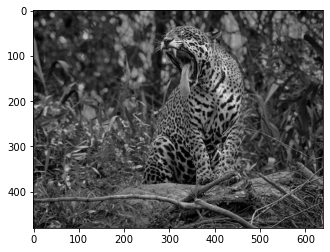

In [73]:
plt.imshow(nova, cmap="gray")

In [78]:
plt.imsave("cinza.jpg",nova, cmap="gray")

## Parte 4.4 - Convertendo para Tons de Cinza de Maneira "Numpytônica"

De acordo com a Teoria da Colorimetria, uma maneira de obter uma representação em tons de cinza de uma imagem é por meio da seguinte operação, em que Y é a nova imagem resultante


$$Y = 0.2126 R + 0.7152 G + 0.0722 B$$

A multiplicação de matriz no numpy é feita de maneira direta, como segue:

$$ nova = imagem @ [0.2126, 0.7152, 0.0722]$$

